In [141]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import StackingCVClassifier
from itertools import cycle
from sklearn.metrics import roc_curve, roc_auc_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
import lightgbm as lgb
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize
from io import BytesIO
from zipfile import ZipFile
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [150]:
zip_file_path = 'Dutch_data_processed.zip'
csv_file_inside_zip = 'Dutch_data_processed.csv'

In [151]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [152]:
warnings.filterwarnings("ignore")

In [153]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Duration,Mode,Depart_time,Distance_in_kms
0,1,2,1,42,0,2,1,1,0,0,...,6,0,0,2,3,3,15,0,10.30,6.0
1,1,2,1,42,0,2,1,1,0,0,...,6,0,0,2,3,3,10,0,11.15,6.0
2,1,2,1,42,0,2,1,1,0,0,...,6,0,0,5,3,3,5,1,15.55,1.0
3,1,2,1,42,0,2,1,1,0,0,...,6,0,0,5,3,3,5,1,18.30,1.0
4,2,0,1,42,0,2,1,1,0,0,...,5,0,0,2,3,3,10,0,9.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692050,3,3,0,49,1,3,1,1,0,0,...,4,0,0,1,2,2,35,0,15.56,11.0
692051,3,3,0,49,1,3,1,1,0,0,...,4,0,0,2,2,2,7,2,16.50,1.1
692052,3,3,0,49,1,3,1,1,0,0,...,4,0,0,2,2,2,5,2,17.15,0.6
692053,3,3,0,49,1,3,1,1,0,0,...,4,0,0,3,2,2,15,0,18.20,6.3


In [6]:
drops = ["Mode"]
X = df.drop(drops, axis=1)

<Axes: >

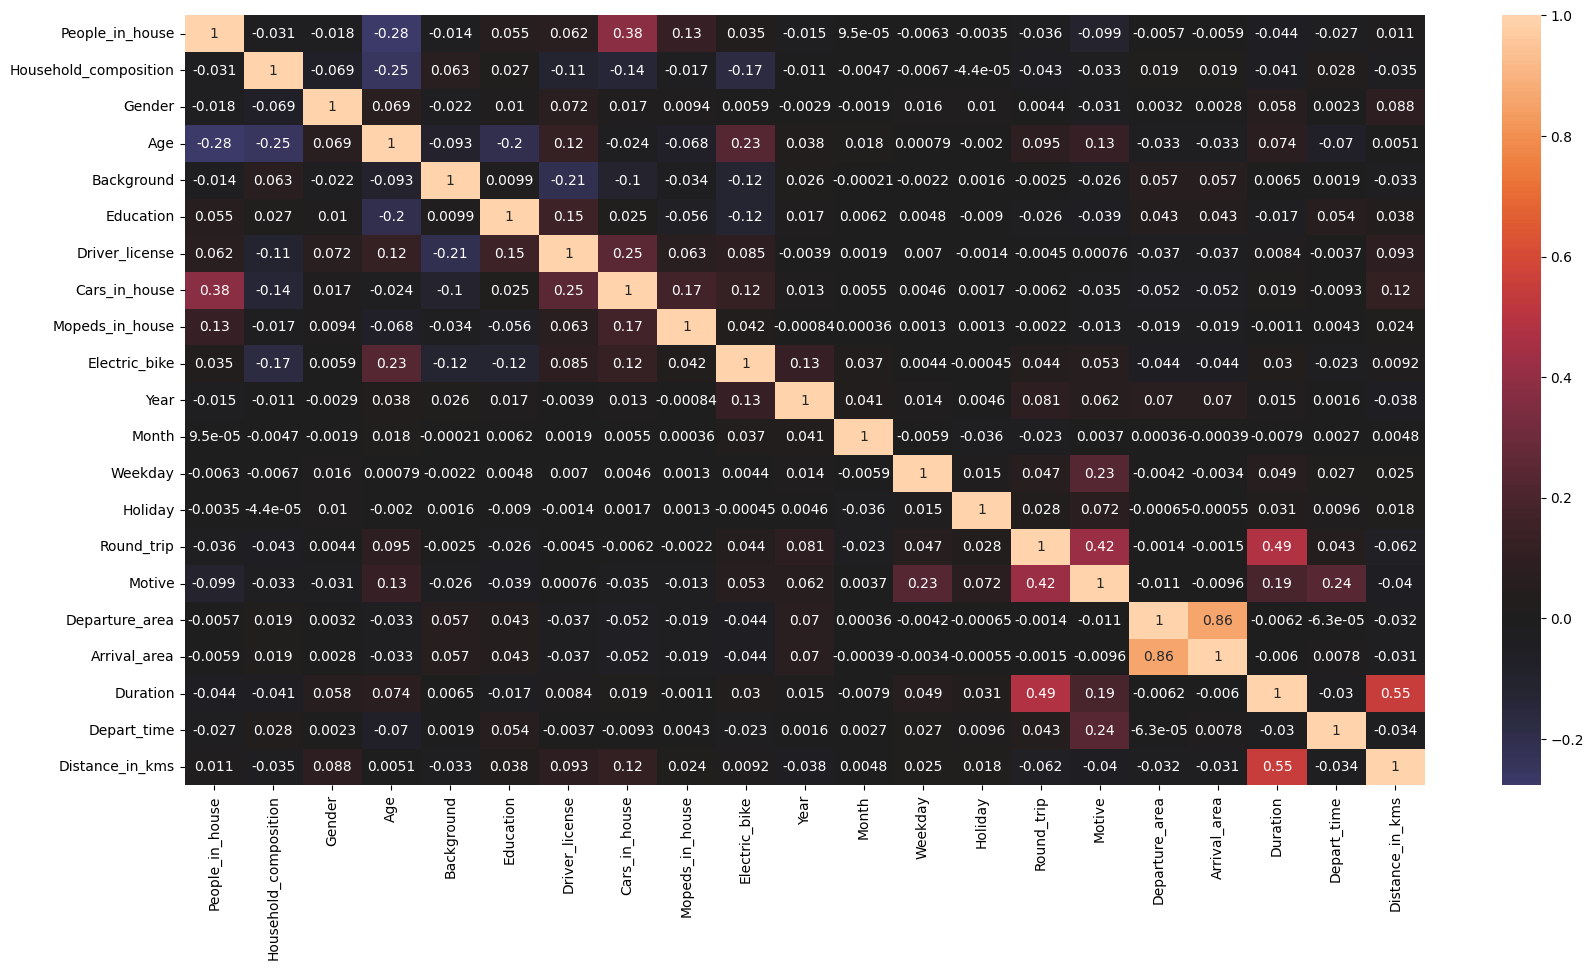

In [7]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [98]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [99]:
X1 = sm.add_constant(df)
vif_data = pd.DataFrame()
vif_data["Variable"] = X1.columns
vif_data["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
print(vif_data)

                 Variable          VIF
0                   const 2038350.2757
1         People_in_house       1.5384
2   Household_composition       1.2152
3                  Gender       1.0192
4                     Age       1.6173
5              Background       1.0538
6               Education       1.4096
7          Driver_license       1.6041
8           Cars_in_house       1.2791
9         Mopeds_in_house       1.0386
10          Electric_bike       1.1145
11                   Year       1.0366
12                  Month       1.0054
13                Weekday       1.0786
14                Holiday       1.0073
15             Round_trip       1.9042
16                 Motive       1.3956
17         Departure_area       4.9759
18           Arrival_area       4.9753
19               Duration       2.3369
20                   Mode       1.3256
21            Depart_time       1.0867
22        Distance_in_kms       1.9462


We will remove Arrival_area, due to high correlation with Departure_area

# 4 labels: Car, Bike, Walk, Public Trasport

In [21]:
drops = ["Mode", "Arrival_area", "Year"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [22]:
X

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Duration,Depart_time,Distance_in_kms
0,1,2,1,42,0,2,1,1,0,0,1,6,0,0,2,3,15,10.30,6.0
1,1,2,1,42,0,2,1,1,0,0,1,6,0,0,2,3,10,11.15,6.0
2,1,2,1,42,0,2,1,1,0,0,1,6,0,0,5,3,5,15.55,1.0
3,1,2,1,42,0,2,1,1,0,0,1,6,0,0,5,3,5,18.30,1.0
4,2,0,1,42,0,2,1,1,0,0,1,5,0,0,2,3,10,9.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692050,3,3,0,49,1,3,1,1,0,0,12,4,0,0,1,2,35,15.56,11.0
692051,3,3,0,49,1,3,1,1,0,0,12,4,0,0,2,2,7,16.50,1.1
692052,3,3,0,49,1,3,1,1,0,0,12,4,0,0,2,2,5,17.15,0.6
692053,3,3,0,49,1,3,1,1,0,0,12,4,0,0,3,2,15,18.20,6.3


In [23]:
X, y = shuffle(X, y, random_state=42)

In [24]:
X

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Duration,Depart_time,Distance_in_kms
450271,2,0,0,59,0,3,1,1,0,1,5,3,0,0,0,4,12,16.00,3.0
28807,2,0,1,82,0,1,1,1,0,0,4,2,0,0,5,2,30,14.15,20.0
74133,3,1,1,55,0,2,1,3,1,0,6,4,0,0,0,2,30,9.00,35.0
343899,2,0,0,62,2,3,1,1,0,0,8,1,0,0,1,2,30,10.00,10.0
655809,5,1,1,51,0,3,1,2,0,0,5,6,0,0,2,1,10,11.30,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,0,1,53,0,3,1,2,0,1,12,1,0,0,3,0,15,19.30,10.0
365838,2,0,1,42,2,3,1,0,0,0,9,4,0,0,0,2,10,10.00,1.8
131932,2,0,0,64,0,2,1,0,0,0,12,2,0,0,1,2,5,10.10,0.6
671155,4,1,1,40,0,2,1,1,0,0,12,1,0,0,1,3,10,13.45,1.1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42, stratify=y)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    253675
1    141458
2    138822
3     19689
Name: count, dtype: int64

Class counts in y_test:
Mode
0    63419
1    35365
2    34705
3     4922
Name: count, dtype: int64


In [28]:
perc=y_train.value_counts(True)*100
print(perc)

Mode
0    45.819155
1    25.550354
2    25.074235
3     3.556256
Name: proportion, dtype: float64


In [29]:
undersampler = RandomUnderSampler(sampling_strategy={0: 19689}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [30]:
undersampler = RandomUnderSampler(sampling_strategy={1: 19689}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [31]:
undersampler = RandomUnderSampler(sampling_strategy={2: 19689}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [32]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

Class counts in y_train:
Mode
0    19689
1    19689
2    19689
3    19689
Name: count, dtype: int64


In [86]:
X_train.shape

(78756, 19)

# Logistic Regression

In [87]:
log_reg=LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'liblinear'],
              'max_iter': [100, 200, 300]}
grid_search_log = GridSearchCV(log_reg, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_log.fit(X_train, y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}


In [33]:
logreg_model=LogisticRegression(C=100, max_iter=100, solver='lbfgs')
logreg_model.fit(X_train, y_train)
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.91      0.65      0.76     63419
           1       0.53      0.51      0.52     35365
           2       0.73      0.89      0.81     34705
           3       0.17      0.59      0.26      4922

    accuracy                           0.67    138411
   macro avg       0.59      0.66      0.59    138411
weighted avg       0.74      0.67      0.69    138411



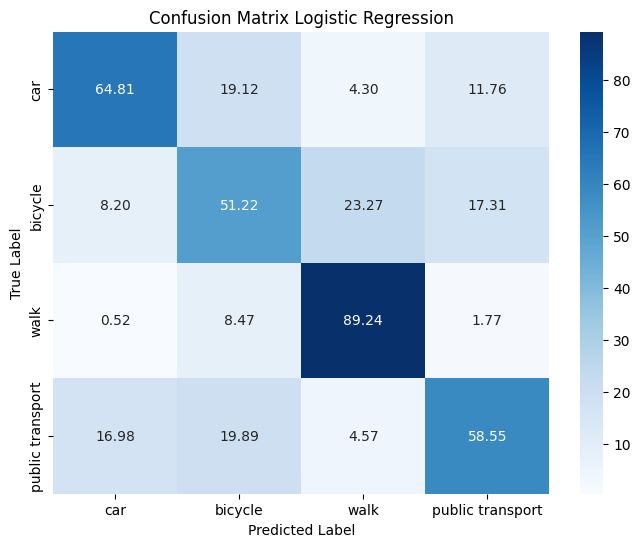

In [34]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
class_labels_mapping = {
    0: 'car',
    1: 'bike',
    2: 'walk',
    3: 'public transport'
}

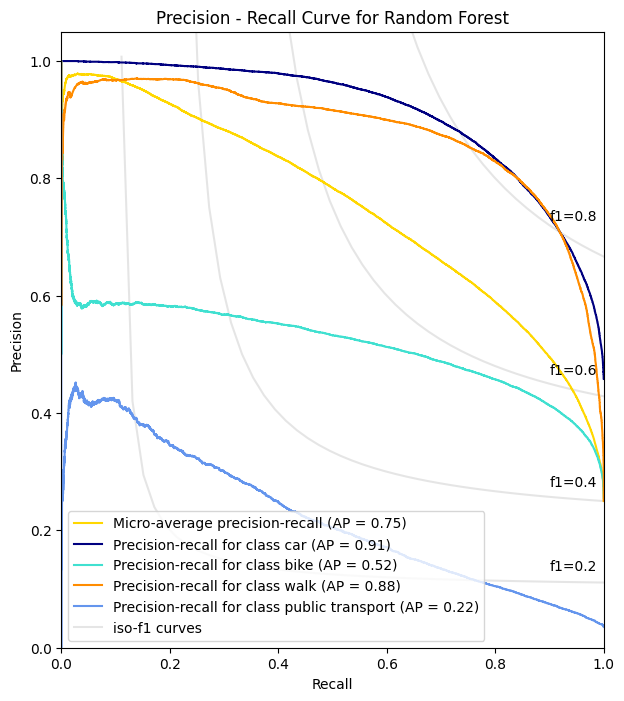

In [36]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest")

plt.show()

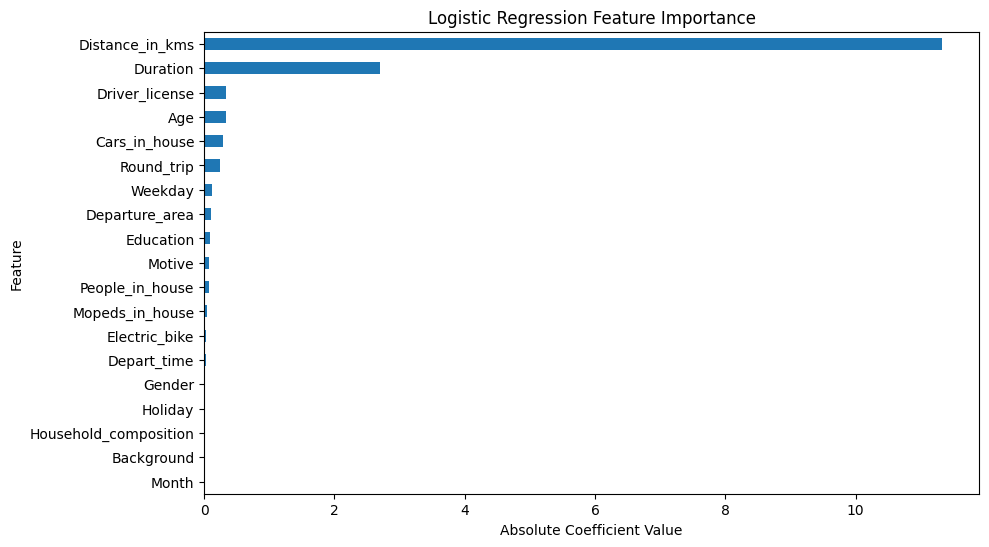

In [37]:
coefficients = pd.Series(logreg_model.coef_[0], index=X.columns)

sorted_coefficients = coefficients.abs().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sorted_coefficients.plot(kind='barh')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

# Decision Tree

In [38]:
 tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.85      0.65      0.74     63419
           1       0.54      0.53      0.53     35365
           2       0.78      0.77      0.77     34705
           3       0.16      0.67      0.26      4922

    accuracy                           0.65    138411
   macro avg       0.58      0.66      0.58    138411
weighted avg       0.73      0.65      0.68    138411



In [94]:
dt_model = DecisionTreeClassifier(random_state=42)

In [95]:
param_grid = {
    'max_depth': list(range(2, 45))
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...]},
             scoring='f1_macro')

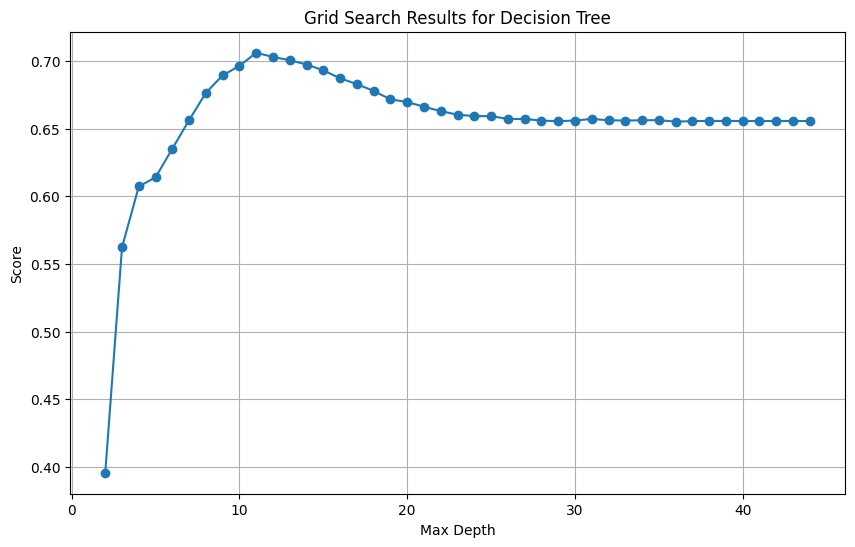

In [96]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [97]:
 tree = DecisionTreeClassifier(random_state = 42, max_depth=11)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.93      0.65      0.76     63419
           1       0.54      0.67      0.60     35365
           2       0.83      0.82      0.82     34705
           3       0.21      0.66      0.32      4922

    accuracy                           0.70    138411
   macro avg       0.63      0.70      0.63    138411
weighted avg       0.78      0.70      0.72    138411



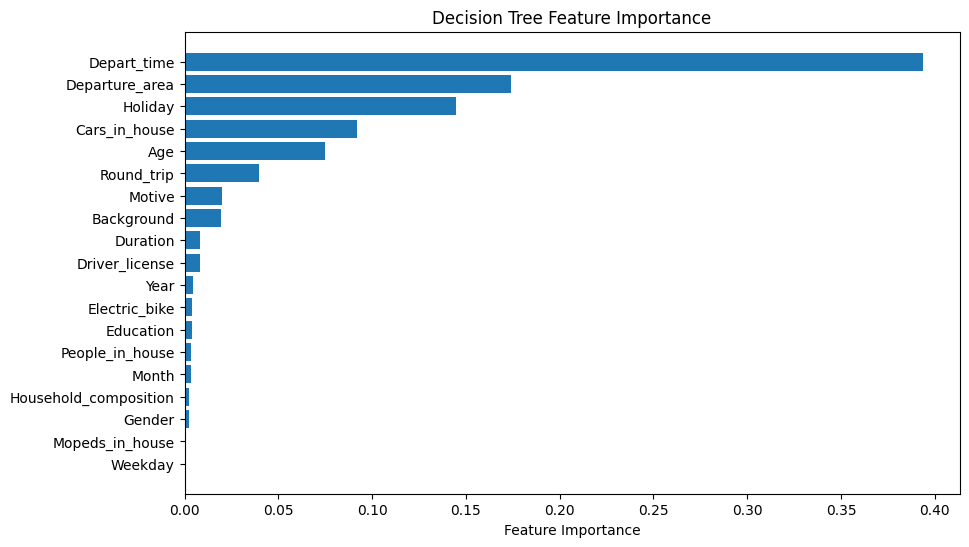

In [98]:
feature_importances = tree.feature_importances_

feature_names = ['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Year','Month', 'Weekday', "Holiday",
       'Round_trip', 'Motive', 'Departure_area', 'Duration', 'Depart_time',
       'Distance_in_kms']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

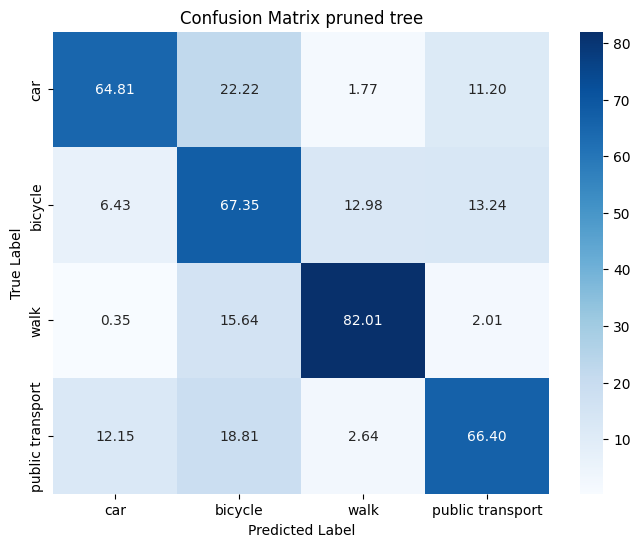

In [99]:
class_labels = ["car", "bicycle", "walk", "public transport"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

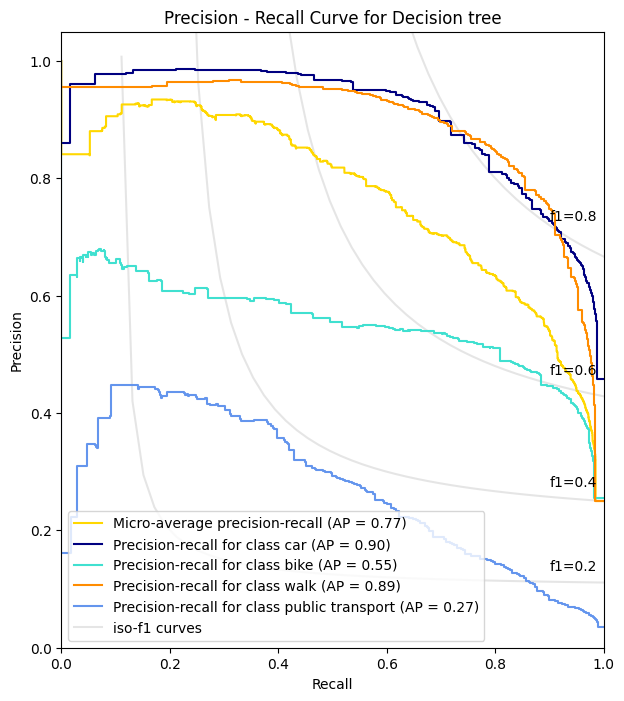

In [100]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(tree.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree")

plt.show()

# Random Forest

In [101]:
X.shape

(692055, 19)

In [102]:
param_grid = {
    'max_features': range(2, 20)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 8}


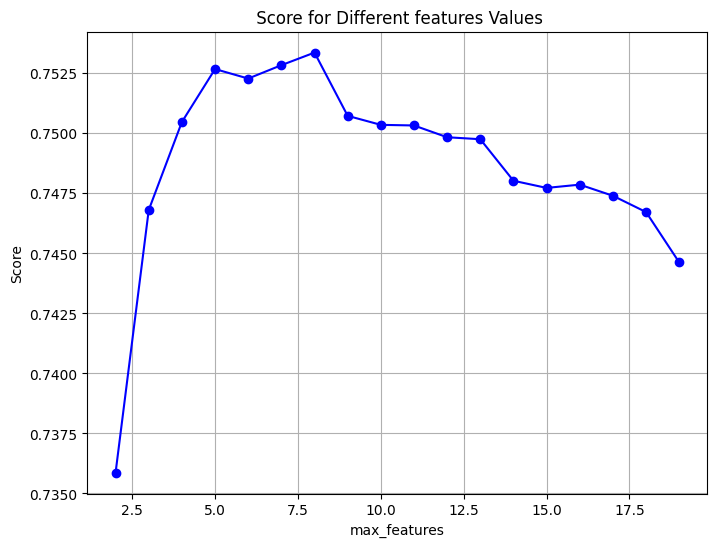

In [103]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [104]:
param_grid = {
    'n_estimators' : [250, 350, 450, 550]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 550}


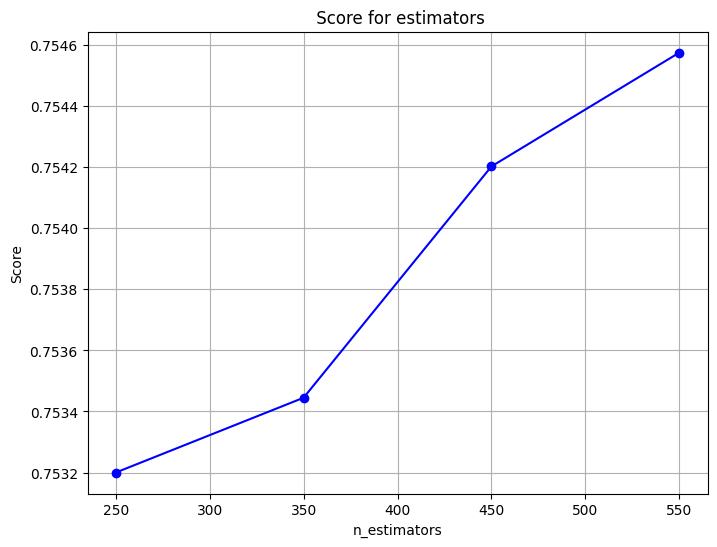

In [105]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['n_estimators']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for estimators')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [108]:
param_grid = {
    'n_estimators' : [500, 550, 600],
    'max_features' : [5, 7, 8]
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 5, 'n_estimators': 600}


In [110]:
random_forest = RandomForestClassifier(random_state=42, max_features=5, n_estimators=600)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_features=5, n_estimators=600, random_state=42)

In [111]:
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.93      0.73      0.82     63419
           1       0.61      0.65      0.63     35365
           2       0.82      0.87      0.84     34705
           3       0.27      0.79      0.40      4922

    accuracy                           0.75    138411
   macro avg       0.66      0.76      0.67    138411
weighted avg       0.80      0.75      0.76    138411



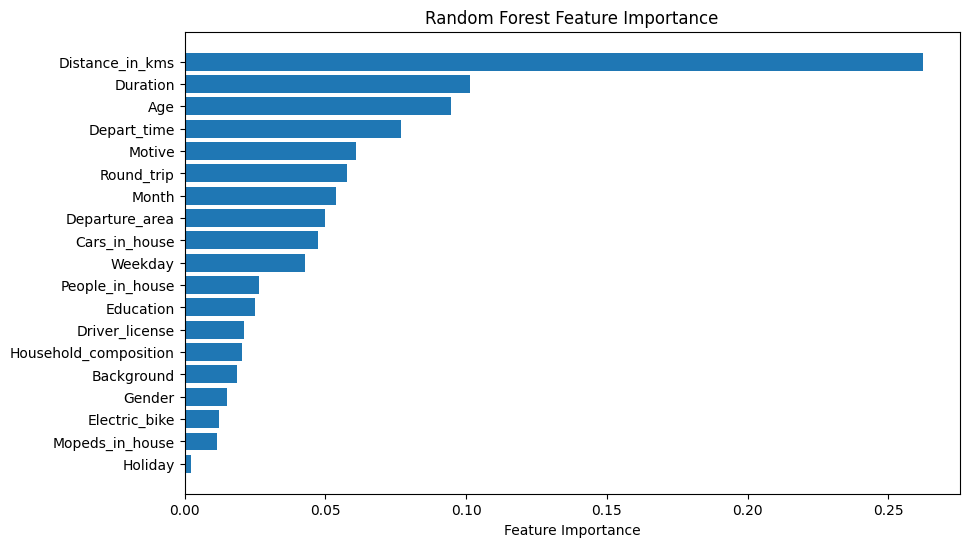

In [112]:
feature_importances = random_forest.feature_importances_

feature_names = ['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday','Holiday',
       'Round_trip', 'Motive', 'Departure_area', 'Duration', 'Depart_time',
       'Distance_in_kms']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

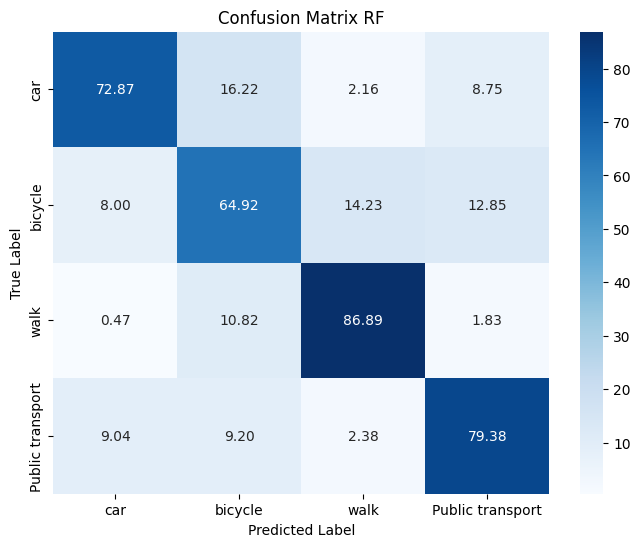

In [114]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

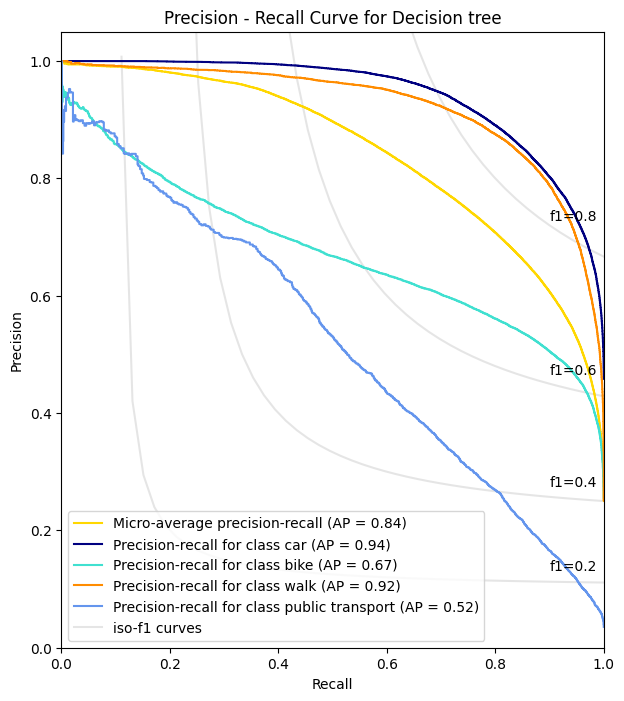

In [115]:
class_probabilities_rf = random_forest.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=random_forest.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(random_forest.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest")

plt.show()

# XGBoost

In [116]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)

In [117]:
param_grid = {
    'n_estimators' : [500, 550, 600, 650],
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'n_estimators': 600}


In [118]:
param_grid = {
    'learning_rate' : [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'learning_rate': 0.5}


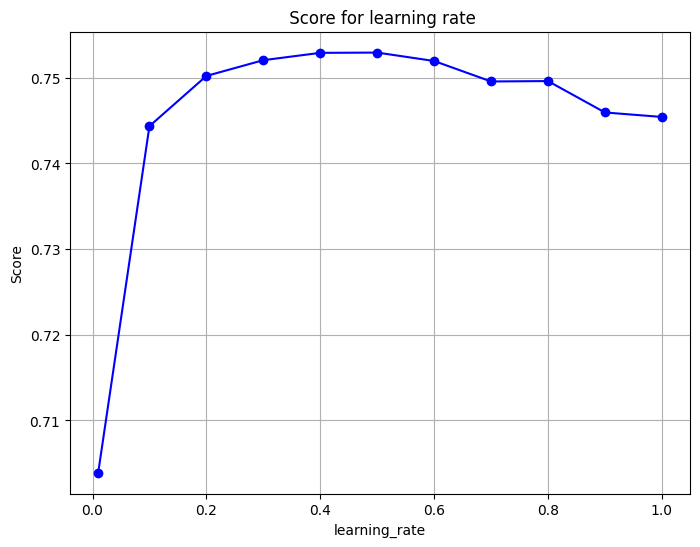

In [119]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['learning_rate']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for learning rate')
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [120]:
param_grid = {
    'subsample' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

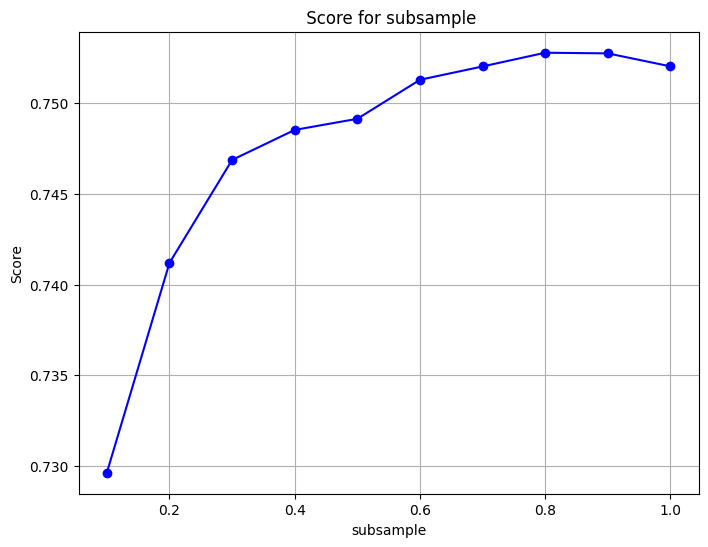

In [121]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['subsample']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for subsample')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [122]:
param_grid = {
    'colsample_bytree' : [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

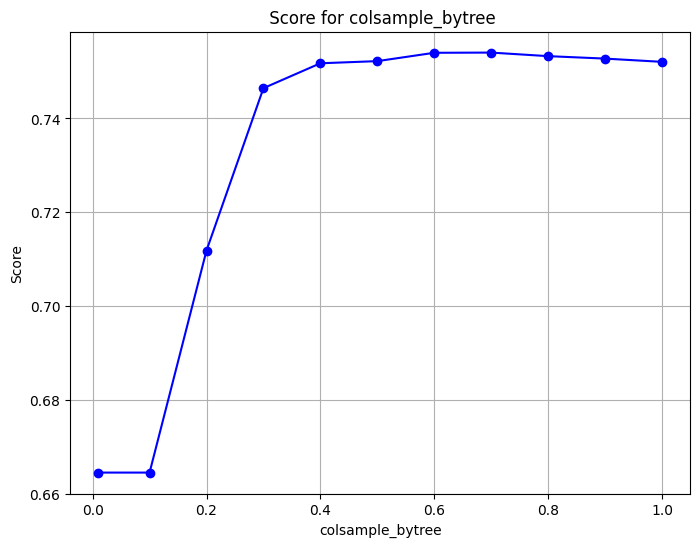

In [123]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['colsample_bytree']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for colsample_bytree')
plt.xlabel('colsample_bytree')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [124]:
param_grid = {
    'learning_rate' : [ 0.3, 0.4, 0.5, 0.6],
    'colsample_bytree' : [0.6, 0.7],
    'subsample' : [0.8, 0.9], 
    'n_estimators' : [450, 550, 600]
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'colsample_bytree': 0.6, 'learning_rate': 0.3, 'n_estimators': 450, 'subsample': 0.9}


In [125]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42,
                                  colsample_bytree=0.6, learning_rate=0.3, n_estimators=450, subsample=0.9)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.92      0.74      0.82     63419
           1       0.62      0.67      0.65     35365
           2       0.83      0.85      0.84     34705
           3       0.28      0.78      0.41      4922

    accuracy                           0.75    138411
   macro avg       0.66      0.76      0.68    138411
weighted avg       0.80      0.75      0.77    138411



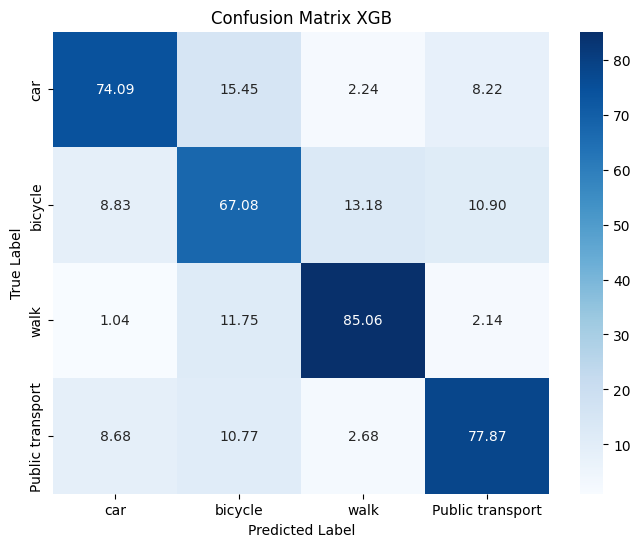

In [126]:
class_labels = ["car", "bicycle", "walk", "Public transport"]
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

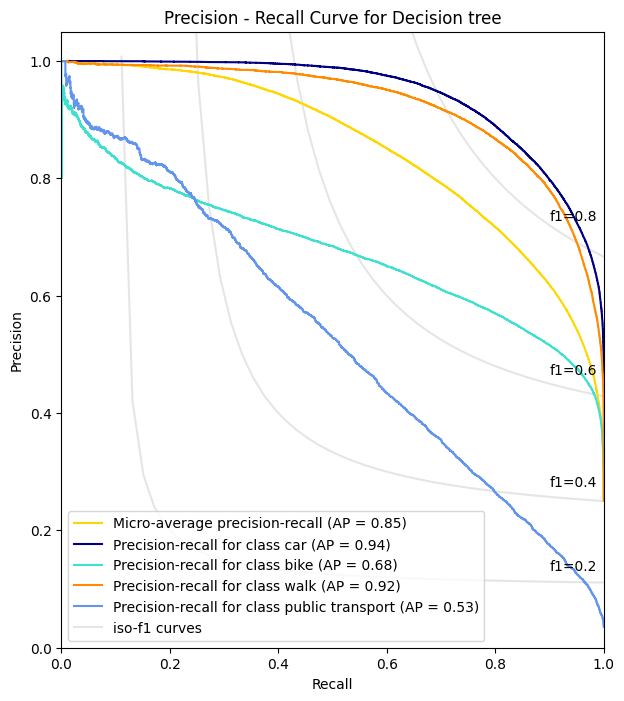

In [127]:
class_probabilities_xgb = xgb_classifier.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=xgb_classifier.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(xgb_classifier.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree")

plt.show()

# Experimenting with 3 class labels

We will now group bicycle and public transport into one class which is Sustainable Transportation.

In [154]:
df['Mode'] = df['Mode'].map({0:0, 1:2, 2:1, 3:2})

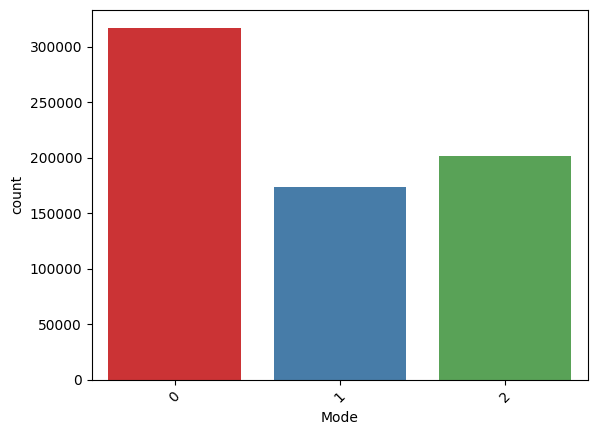

In [155]:
sns.countplot(x='Mode', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.show()

In [156]:
drops = ["Mode", "Arrival_area", "Year"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [157]:
X, y = shuffle(X, y, random_state=42)
X

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Duration,Depart_time,Distance_in_kms
450271,2,0,0,59,0,3,1,1,0,1,5,3,0,0,0,4,12,16.00,3.0
28807,2,0,1,82,0,1,1,1,0,0,4,2,0,0,5,2,30,14.15,20.0
74133,3,1,1,55,0,2,1,3,1,0,6,4,0,0,0,2,30,9.00,35.0
343899,2,0,0,62,2,3,1,1,0,0,8,1,0,0,1,2,30,10.00,10.0
655809,5,1,1,51,0,3,1,2,0,0,5,6,0,0,2,1,10,11.30,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,0,1,53,0,3,1,2,0,1,12,1,0,0,3,0,15,19.30,10.0
365838,2,0,1,42,2,3,1,0,0,0,9,4,0,0,0,2,10,10.00,1.8
131932,2,0,0,64,0,2,1,0,0,0,12,2,0,0,1,2,5,10.10,0.6
671155,4,1,1,40,0,2,1,1,0,0,12,1,0,0,1,3,10,13.45,1.1


In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42, stratify=y)

In [159]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [160]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    253675
2    161147
1    138822
Name: count, dtype: int64

Class counts in y_test:
Mode
0    63419
2    40287
1    34705
Name: count, dtype: int64


In [161]:
undersampler = RandomUnderSampler(sampling_strategy={0: 161147}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [162]:
y_train_series = pd.Series(y_train)
print(y_train_series.value_counts())

Mode
0    161147
2    161147
1    138822
Name: count, dtype: int64


# Logistic Regression

In [147]:
log_reg=LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'liblinear'],
              'max_iter': [100, 200, 300]}
grid_search_log = GridSearchCV(log_reg, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_log.fit(X_train, y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}


In [148]:
logreg_model=LogisticRegression(C=100, max_iter=100, solver='lbfgs')
logreg_model.fit(X_train, y_train)
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.88      0.73      0.80     63419
           1       0.75      0.89      0.81     34705
           2       0.60      0.67      0.63     40287

    accuracy                           0.75    138411
   macro avg       0.75      0.76      0.75    138411
weighted avg       0.77      0.75      0.76    138411



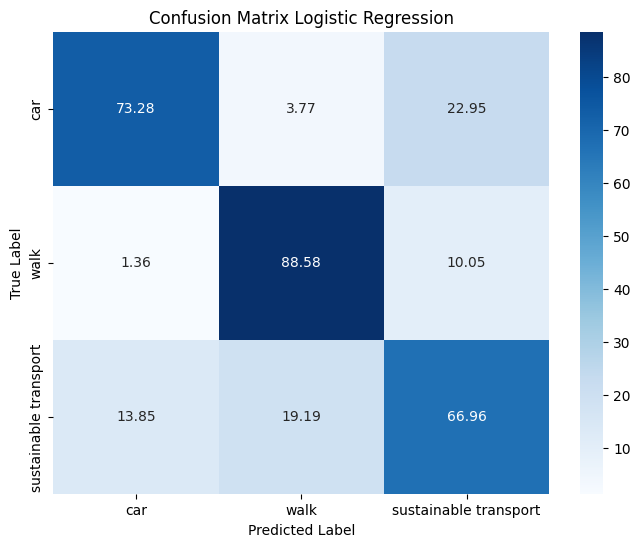

In [149]:
class_labels = ["car","walk", "sustainable transport"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_log) / conf_matrix_log.sum(axis=1)
conf_matrix_percentages_log = (conf_matrix_log.T / conf_matrix_log.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_log, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [150]:
class_labels_mapping = {
    0: 'car',
    1: 'walk',
    2: 'sustainable transport'
}

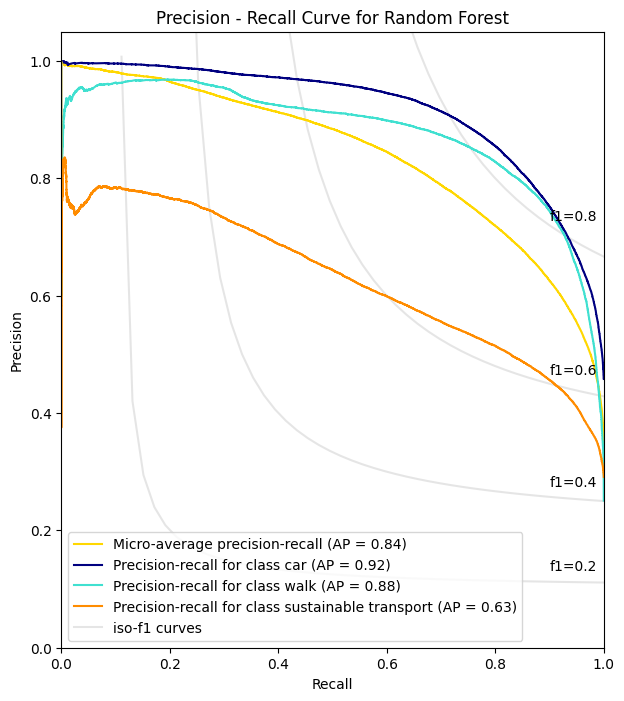

In [151]:
class_probabilities_log = logreg_model.predict_proba(X_test)
y_pred_prob_log = np.argmax(class_probabilities_log, axis=1)
y_test_bin_log = label_binarize(y_test, classes=logreg_model.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(logreg_model.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_log[:, i], class_probabilities_log[:, i])
    average_precision[i] = average_precision_score(y_test_bin_log[:, i], class_probabilities_log[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_log.ravel(), class_probabilities_log.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_log, class_probabilities_log, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest")

plt.show()

# Decision Tree

In [152]:
 tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84     63419
           1       0.83      0.84      0.84     34705
           2       0.67      0.74      0.70     40287

    accuracy                           0.80    138411
   macro avg       0.79      0.80      0.79    138411
weighted avg       0.80      0.80      0.80    138411



In [153]:
dt_model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': list(range(2, 45))
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='f1_macro', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...]},
             scoring='f1_macro')

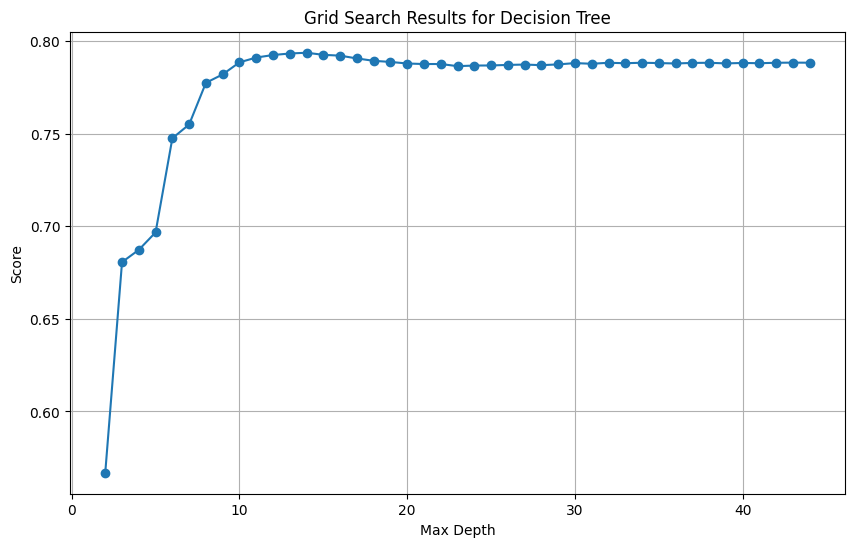

In [154]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [159]:
 tree = DecisionTreeClassifier(random_state = 42, max_depth=14)
tree.fit(X_train, y_train)
y_pred_test = tree.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83     63419
           1       0.83      0.84      0.84     34705
           2       0.62      0.77      0.69     40287

    accuracy                           0.79    138411
   macro avg       0.79      0.79      0.79    138411
weighted avg       0.81      0.79      0.79    138411



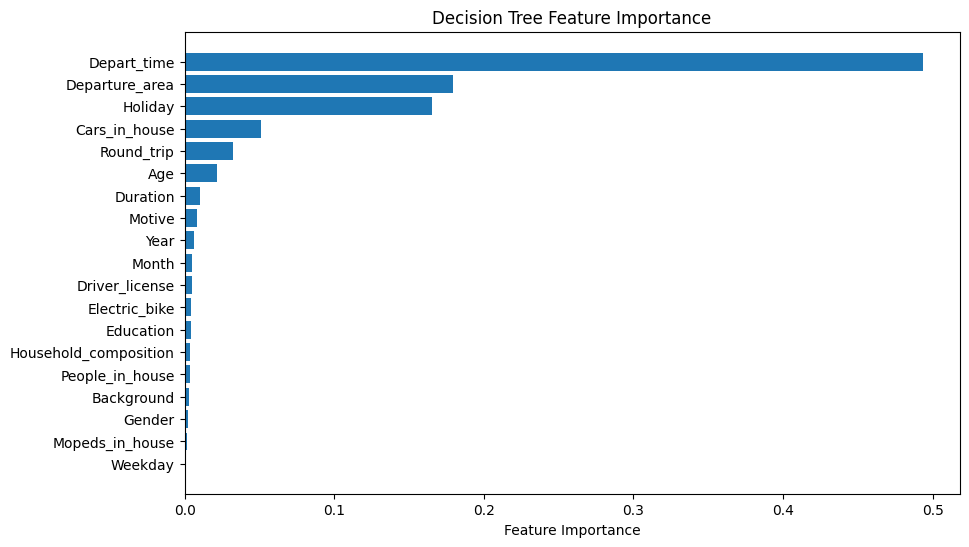

In [160]:
feature_importances = tree.feature_importances_

feature_names = ['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Year','Month', 'Weekday', "Holiday",
       'Round_trip', 'Motive', 'Departure_area', 'Duration', 'Depart_time',
       'Distance_in_kms']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

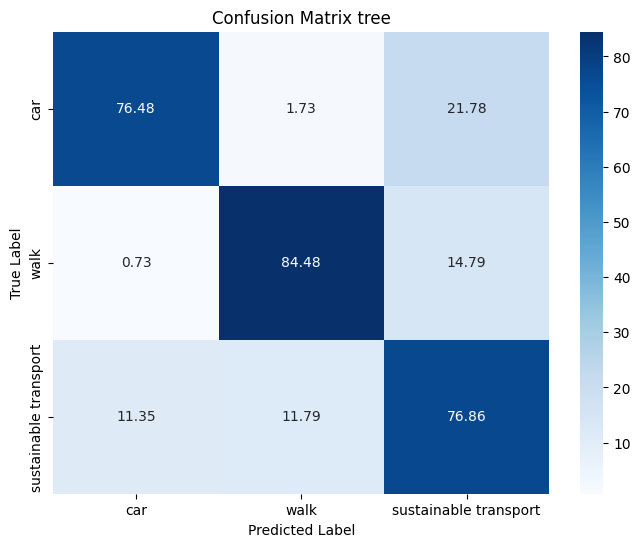

In [161]:
class_labels = ["car", "walk", "sustainable transport"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_dt) / conf_matrix_dt.sum(axis=1)
conf_matrix_percentages_dt = (conf_matrix_dt.T / conf_matrix_dt.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_dt, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

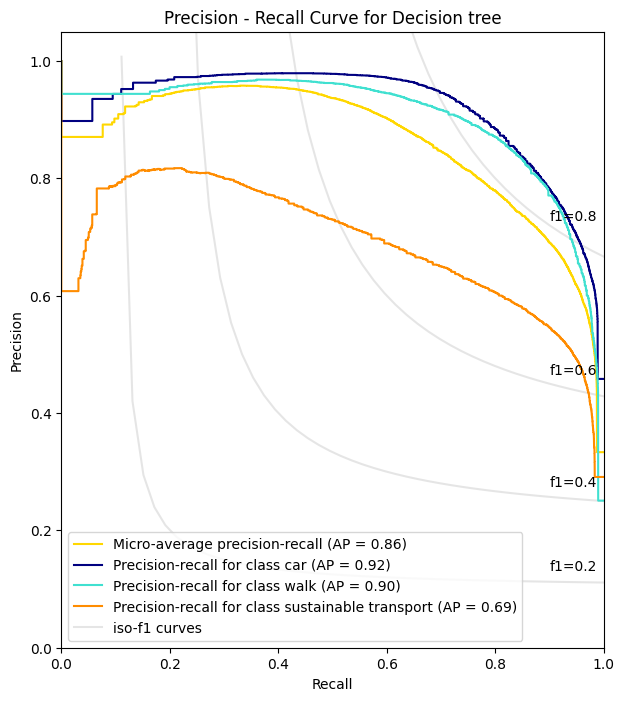

In [162]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(tree.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    average_precision[i] = average_precision_score(y_test_bin_tree[:, i], class_probabilities_tree[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_tree.ravel(), class_probabilities_tree.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_tree, class_probabilities_tree, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Decision tree")

plt.show()

# Random Forest

In [15]:
param_grid = {
    'max_features': range(2, 20)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 3}


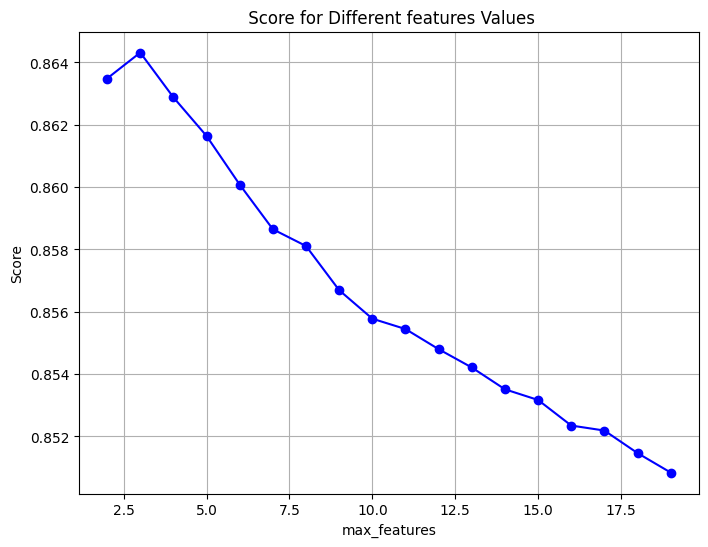

In [16]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [61]:
random_forest = RandomForestClassifier(random_state=42, max_features=3, n_estimators=400)
random_forest.fit(X_train, y_train)
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.94      0.85      0.90     63419
           1       0.88      0.91      0.90     34705
           2       0.76      0.85      0.80     40287

    accuracy                           0.87    138411
   macro avg       0.86      0.87      0.86    138411
weighted avg       0.87      0.87      0.87    138411



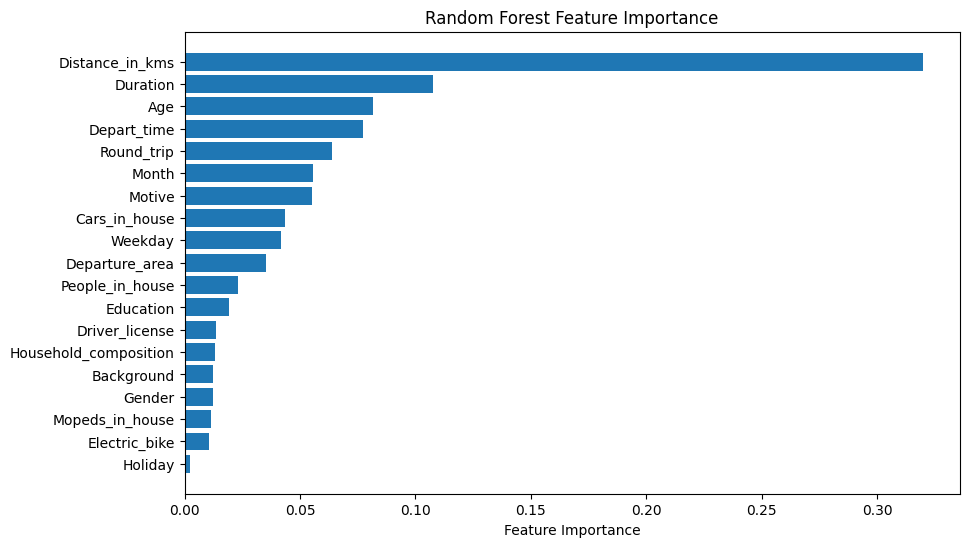

In [62]:
feature_importances = random_forest.feature_importances_

feature_names = ['People_in_house', 'Household_composition', 'Gender', 'Age',
       'Background', 'Education', 'Driver_license', 'Cars_in_house',
       'Mopeds_in_house', 'Electric_bike', 'Month', 'Weekday','Holiday',
       'Round_trip', 'Motive', 'Departure_area', 'Duration', 'Depart_time',
       'Distance_in_kms']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

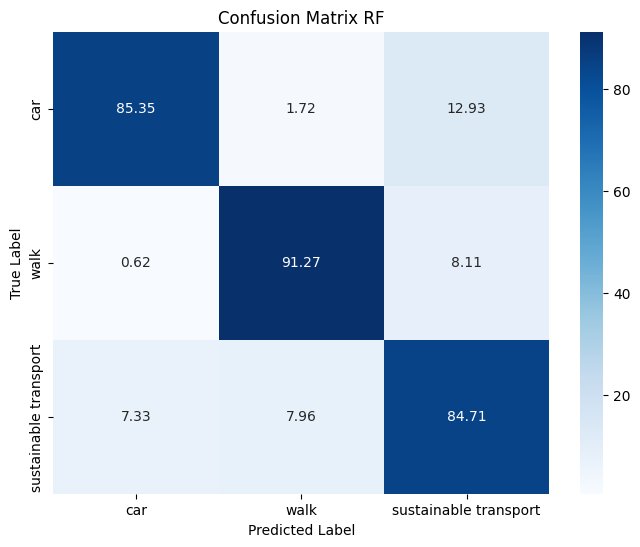

In [63]:
class_labels = ["car","walk", "sustainable transport"]
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_rf) / conf_matrix_rf.sum(axis=1)
conf_matrix_percentages_rf = (conf_matrix_rf.T / conf_matrix_rf.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_rf, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix RF')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [166]:
class_labels_mapping = {
    0: 'car',
    1: 'walk',
    2: 'sustainable transport'
}

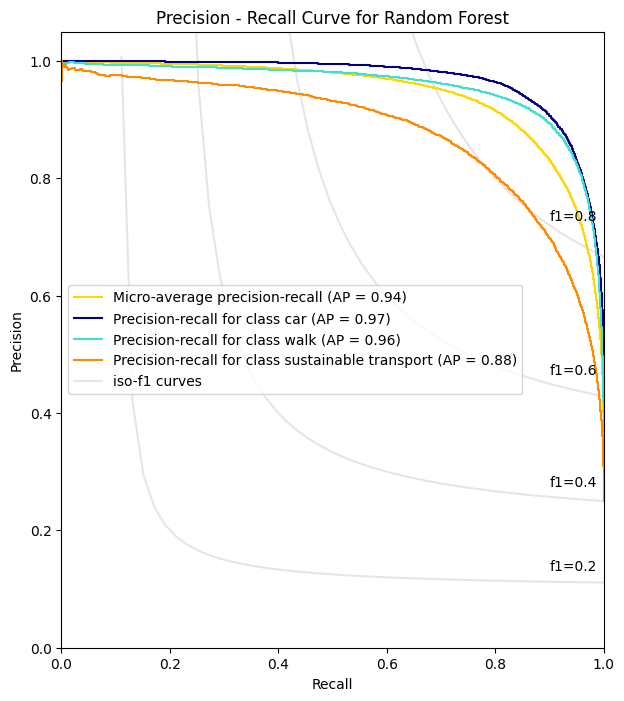

In [65]:
class_probabilities_rf = random_forest.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=random_forest.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(random_forest.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    average_precision[i] = average_precision_score(y_test_bin_rf[:, i], class_probabilities_rf[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_rf.ravel(), class_probabilities_rf.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_rf, class_probabilities_rf, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for Random Forest")

plt.show()

# XGBoost

In [48]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [49]:
param_grid = {
    'learning_rate' : [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'learning_rate': 0.8}


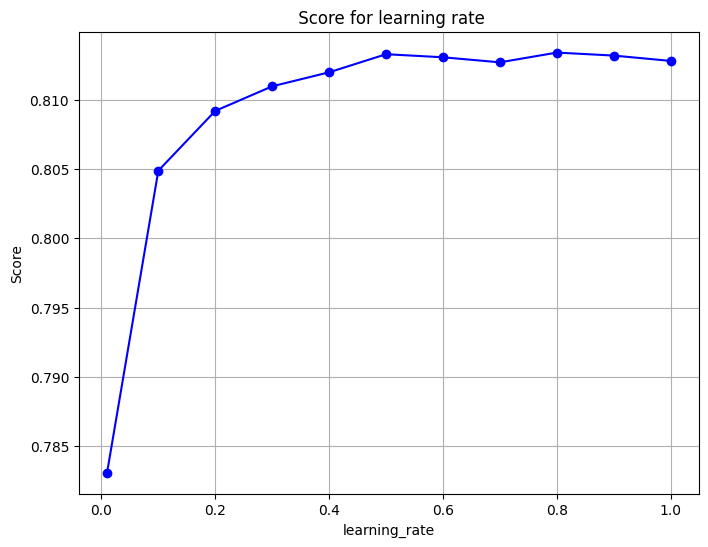

In [50]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['learning_rate']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for learning rate')
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [51]:
param_grid = {
    'n_estimators' : [500, 550, 600, 650],
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'n_estimators': 650}


In [52]:
param_grid = {
    'subsample' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_

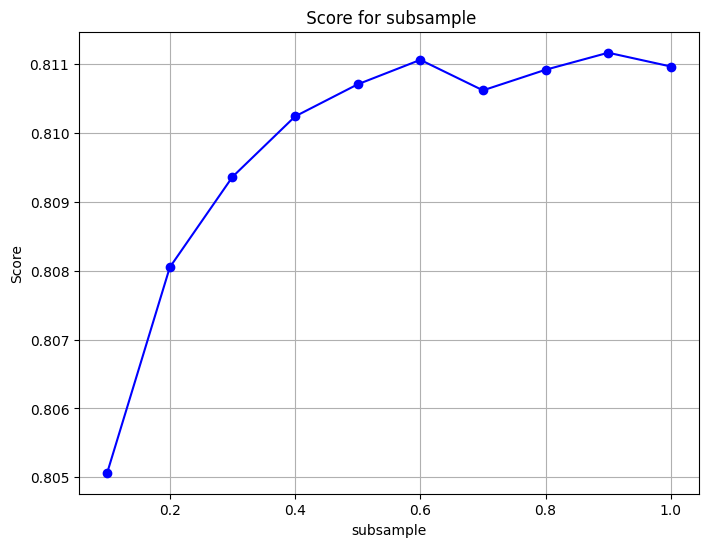

In [53]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['subsample']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for subsample')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [54]:
param_grid = {
    'colsample_bytree' : [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                              0.6, 0.7, 0.8, 0.9, 1]},
             scoring='f1_macro')

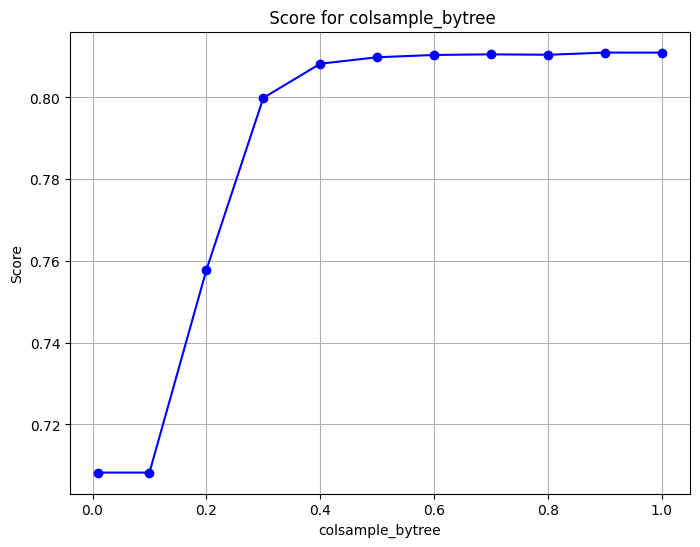

In [55]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['colsample_bytree']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for colsample_bytree')
plt.xlabel('colsample_bytree')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [56]:
param_grid = {
    'learning_rate' : [0.5, 0.8],
    'colsample_bytree' : [0.7, 0.9],
    'subsample' : [0.6, 0.9], 
    'n_estimators' : [500, 600, 650]
}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, scoring="f1_macro", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_xgb = grid_search.best_params_
print(best_params_xgb)

{'colsample_bytree': 0.9, 'learning_rate': 0.5, 'n_estimators': 650, 'subsample': 0.9}


In [163]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42,
                                  colsample_bytree=0.9, learning_rate=0.5, n_estimators=650, subsample=0.9)
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
xgbreport = classification_report(y_test, y_pred)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86     63419
           1       0.85      0.87      0.86     34705
           2       0.68      0.79      0.73     40287

    accuracy                           0.82    138411
   macro avg       0.81      0.82      0.82    138411
weighted avg       0.83      0.82      0.82    138411



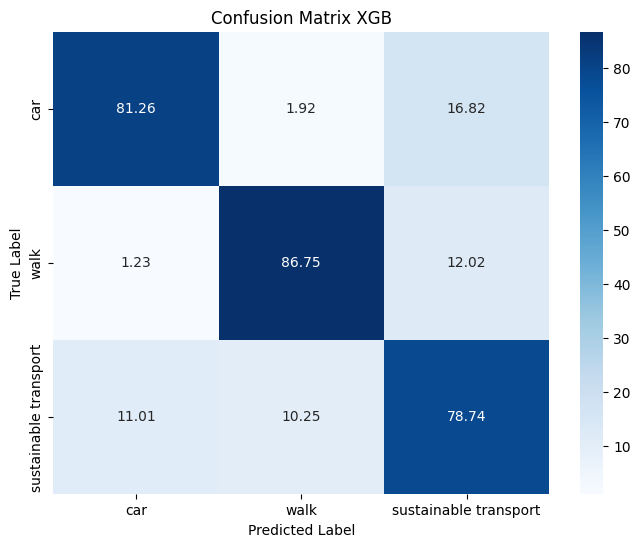

In [167]:
class_labels = ["car", "walk", "sustainable transport"]
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_xgb) / conf_matrix_xgb.sum(axis=1)
conf_matrix_percentages_xgb = (conf_matrix_xgb.T / conf_matrix_xgb.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_xgb, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix XGB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

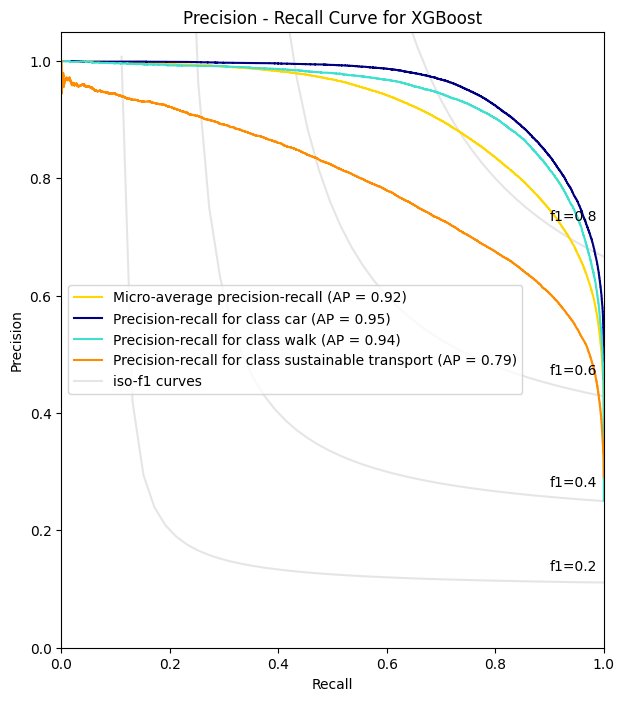

In [168]:
class_probabilities_xgb = xgb_classifier.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=xgb_classifier.classes_)
precision = dict()
recall = dict()
average_precision = dict()
for i in range(len(xgb_classifier.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, (class_labels, color) in enumerate(zip(class_labels, colors)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for XGBoost")

plt.show()

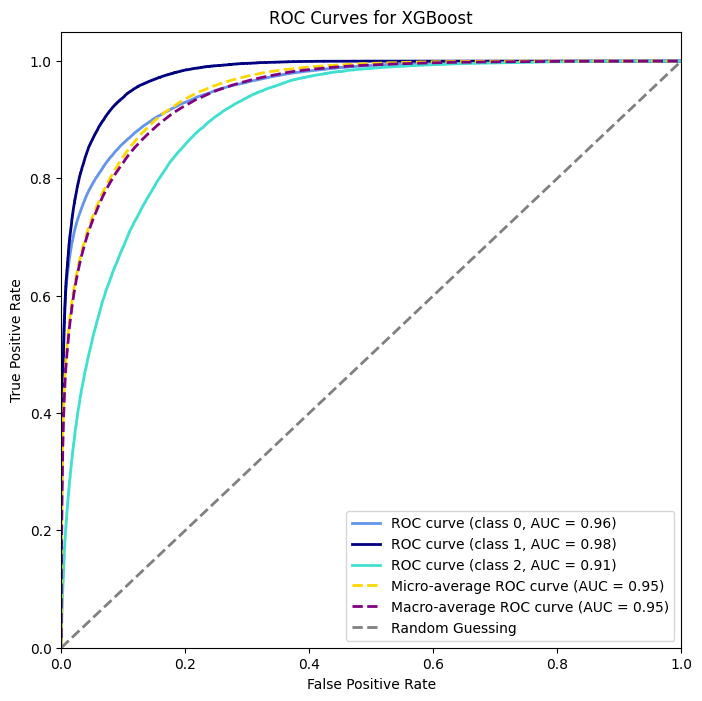

In [170]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])

# Calculate micro ROC curve and AUC score
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin_xgb.ravel(), class_probabilities_xgb.ravel())
roc_auc_micro = roc_auc_score(y_test_bin_xgb, class_probabilities_xgb, average="micro")

# Calculate macro ROC curve and AUC score
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= num_classes

fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = roc_auc_score(y_test_bin_xgb, class_probabilities_xgb, average="macro")

# Plot ROC curves
plt.figure(figsize=(8, 8))

# Plot ROC curves for each class
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:0.2f})')

# Plot micro ROC curve
plt.plot(fpr_micro, tpr_micro, color='gold', lw=2, label=f'Micro-average ROC curve (AUC = {roc_auc_micro:0.2f})', linestyle='--')

# Plot macro ROC curve
plt.plot(fpr_macro, tpr_macro, color='purple', lw=2, label=f'Macro-average ROC curve (AUC = {roc_auc_macro:0.2f})', linestyle='--')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guessing')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for XGBoost')
plt.legend(loc="lower right")
plt.show()

# LSTM

In [119]:
drops = ["Mode", "Arrival_area", "Year"]
X = df.drop(drops, axis=1)
y = df["Mode"]

In [120]:
X, y = shuffle(X, y, random_state=42)
X

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Departure_area,Duration,Depart_time,Distance_in_kms
450271,2,0,0,59,0,3,1,1,0,1,5,3,0,0,0,4,12,16.00,3.0
28807,2,0,1,82,0,1,1,1,0,0,4,2,0,0,5,2,30,14.15,20.0
74133,3,1,1,55,0,2,1,3,1,0,6,4,0,0,0,2,30,9.00,35.0
343899,2,0,0,62,2,3,1,1,0,0,8,1,0,0,1,2,30,10.00,10.0
655809,5,1,1,51,0,3,1,2,0,0,5,6,0,0,2,1,10,11.30,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2,0,1,53,0,3,1,2,0,1,12,1,0,0,3,0,15,19.30,10.0
365838,2,0,1,42,2,3,1,0,0,0,9,4,0,0,0,2,10,10.00,1.8
131932,2,0,0,64,0,2,1,0,0,0,12,2,0,0,1,2,5,10.10,0.6
671155,4,1,1,40,0,2,1,1,0,0,12,1,0,0,1,3,10,13.45,1.1


In [121]:
# Convert labels to one-hot encoding
y_one_hot = to_categorical(y, num_classes=3)

In [122]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42, stratify=y)

In [123]:
X_train.shape

(553644, 19)

In [124]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:
undersampler = RandomUnderSampler(sampling_strategy={0: 161147}, random_state=1)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [126]:
X_train.shape

(461116, 19)

In [127]:
# Reshape X_train to add a time step dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

# Reshape X_test similarly
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [128]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(3, activation='softmax'))  # Output layer with three neurons for three classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Use 'adam' optimizer and categorical crossentropy loss for multi-class classification

# Fit the model
history = model.fit(X_train, y_train, epochs=20, batch_size=60, validation_data=(X_test, y_test))

Epoch 1/20
7686/7686 [==============================] - 67s 9ms/step - loss: 0.6263 - accuracy: 0.7170 - val_loss: 0.5502 - val_accuracy: 0.7507
Epoch 2/20
7686/7686 [==============================] - 66s 9ms/step - loss: 0.5476 - accuracy: 0.7604 - val_loss: 0.5401 - val_accuracy: 0.7526
Epoch 3/20
7686/7686 [==============================] - 66s 9ms/step - loss: 0.5304 - accuracy: 0.7693 - val_loss: 0.5084 - val_accuracy: 0.7773
Epoch 4/20
7686/7686 [==============================] - 61s 8ms/step - loss: 0.5213 - accuracy: 0.7741 - val_loss: 0.4936 - val_accuracy: 0.7831
Epoch 5/20
7686/7686 [==============================] - 63s 8ms/step - loss: 0.5138 - accuracy: 0.7777 - val_loss: 0.5119 - val_accuracy: 0.7755
Epoch 6/20
7686/7686 [==============================] - 69s 9ms/step - loss: 0.5089 - accuracy: 0.7796 - val_loss: 0.4891 - val_accuracy: 0.7870
Epoch 7/20
7686/7686 [==============================] - 72s 9ms/step - loss: 0.5050 - accuracy: 0.7821 - val_loss: 0.5070 - val_ac

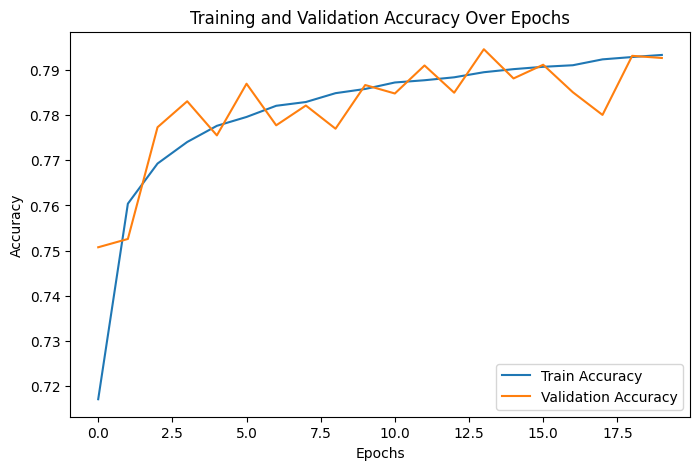

In [129]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [130]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to single labels
y_true = np.argmax(y_test, axis=1)

# Generate a classification report
report = classification_report(y_true, y_pred_classes)
print(report)

4326/4326 [==============================] - 13s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.81      0.85     63419
           1       0.78      0.90      0.84     34705
           2       0.67      0.68      0.67     40287

    accuracy                           0.79    138411
   macro avg       0.78      0.79      0.78    138411
weighted avg       0.80      0.79      0.79    138411



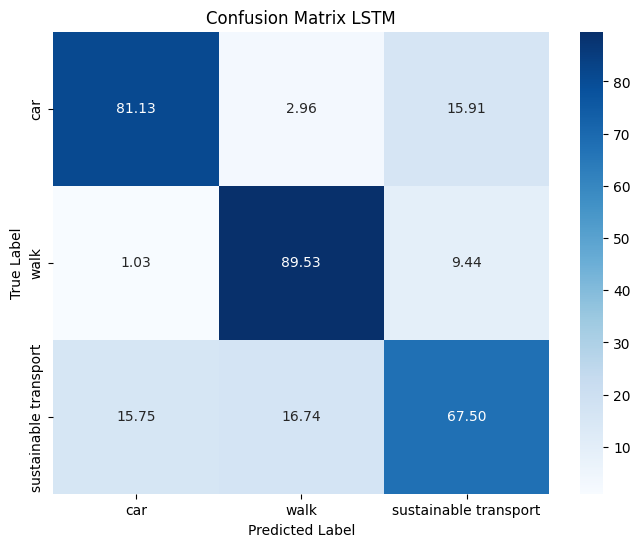

In [147]:
class_labels = ["car", "walk", "sustainable transport"]
conf_matrix_lstm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
class_accuracies = np.diag(conf_matrix_lstm) / conf_matrix_lstm.sum(axis=1)
conf_matrix_percentages_lstm = (conf_matrix_lstm.T / conf_matrix_lstm.sum(axis=1)).T * 100
sns.heatmap(conf_matrix_percentages_lstm, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix LSTM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

4326/4326 [==============================] - 13s 3ms/step


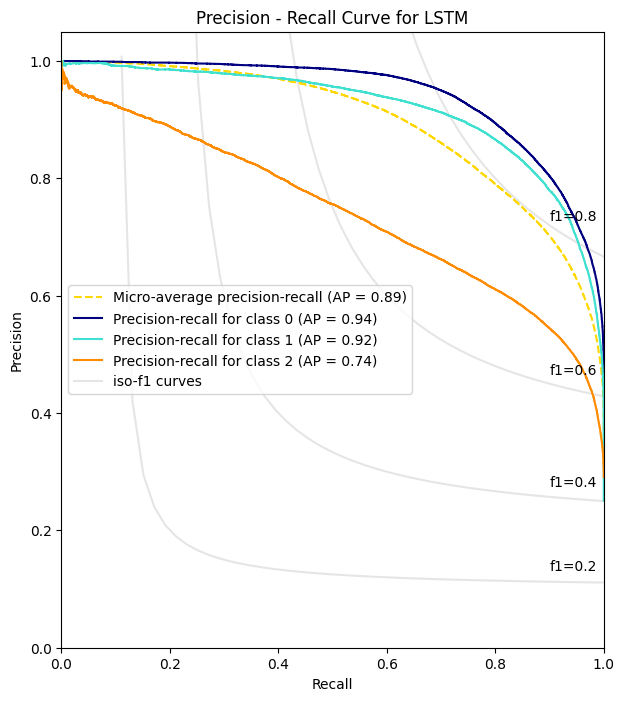

In [148]:
class_probabilities_lstm = model.predict(X_test)
num_classes = class_probabilities_lstm.shape[1]  # Determine the number of classes

y_pred_prob_xgb = np.argmax(class_probabilities_lstm, axis=1)
y_test_bin_xgb = label_binarize(y_true, classes=np.arange(num_classes))  # Use np.arange to create an array of classes

precision = dict()
recall = dict()
average_precision = dict()

for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin_xgb[:, i], class_probabilities_lstm[:, i])
    average_precision[i] = average_precision_score(y_test_bin_xgb[:, i], class_probabilities_lstm[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test_bin_xgb.ravel(), class_probabilities_lstm.ravel()
)
average_precision["micro"] = average_precision_score(y_test_bin_xgb, class_probabilities_lstm, average="micro")

colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold", linestyle='--')

for i, color in zip(range(num_classes), colors):
    class_name = f'class {i}'
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for {class_name}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Precision - Recall Curve for LSTM")

plt.show()

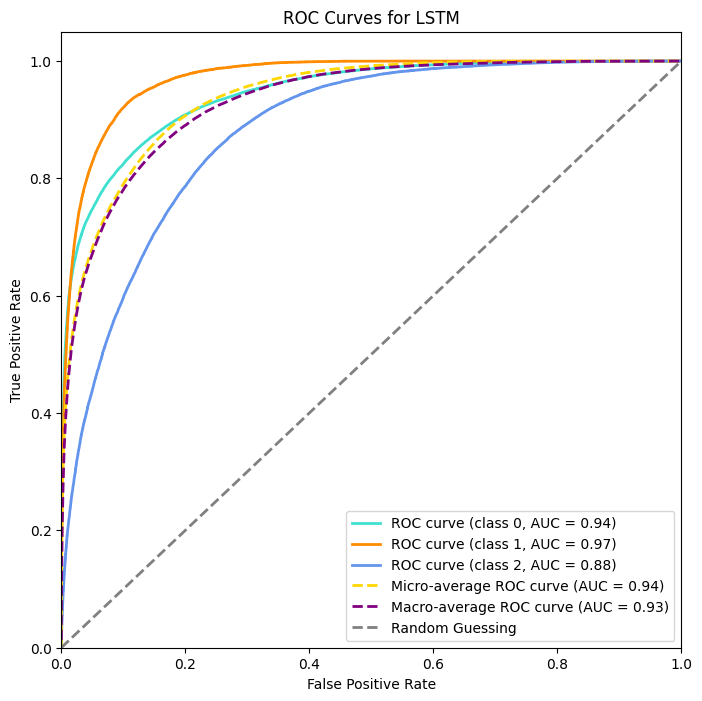

In [144]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_xgb[:, i], class_probabilities_lstm[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin_xgb[:, i], class_probabilities_lstm[:, i])

# Calculate micro ROC curve and AUC score
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin_xgb.ravel(), class_probabilities_lstm.ravel())
roc_auc_micro = roc_auc_score(y_test_bin_xgb, class_probabilities_lstm, average="micro")

# Calculate macro ROC curve and AUC score
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= num_classes

fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = roc_auc_score(y_test_bin_xgb, class_probabilities_lstm, average="macro")

# Plot ROC curves
plt.figure(figsize=(8, 8))

# Plot ROC curves for each class
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}, AUC = {roc_auc[i]:0.2f})')

# Plot micro ROC curve
plt.plot(fpr_micro, tpr_micro, color='gold', lw=2, label=f'Micro-average ROC curve (AUC = {roc_auc_micro:0.2f})', linestyle='--')

# Plot macro ROC curve
plt.plot(fpr_macro, tpr_macro, color='purple', lw=2, label=f'Macro-average ROC curve (AUC = {roc_auc_macro:0.2f})', linestyle='--')

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guessing')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for LSTM')
plt.legend(loc="lower right")
plt.show()